In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################
df = pd.read_csv("data/hammettdata.csv", 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="pH", 
                 comment = "#") 

df["logk"] = np.log10(df["k_obs"])

df

,Reactant,X,Y,Z,sum_sigma,sum_sigma_plus,k_obs,logk
0,1,H,p-Cl,p-Cl,0.46,0.22,0.096,-1.017729
1,2,m-CF3,H,H,0.43,0.43,0.052,-1.283997
2,3,m-Cl,H,H,0.37,0.37,0.100,-1.000000
3,4,H,p-Cl,H,0.23,0.11,0.300,-0.522879
4,5,m-OCH3,H,H,0.12,0.12,0.740,-0.130768
5,6,H,H,H,0.00,0.00,1.000,0.000000
6,7,m-CH3,H,H,-0.07,-0.07,1.480,0.170262
7,8,H,p-CH3,H,-0.17,-0.31,3.270,0.514548
8,9,H,p-OCH3,H,-0.27,-0.78,0.560,-0.251812
9,10,H,p-CH3,p-CH3,-0.34,-0.62,5.800,0.763428


2.7625866175213183 2.2249617496959884 0.958614053353119
-2.567636420925082 -0.12958991182686613 0.9064879815740957


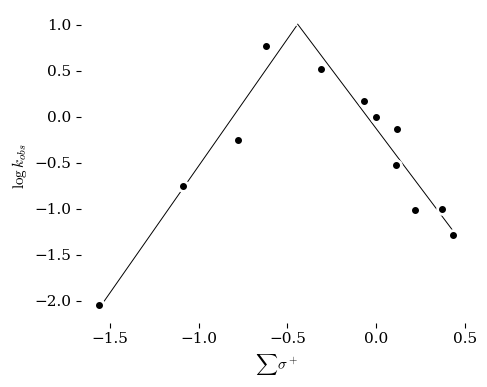

In [2]:
#x = df["sum_sigma"][0:8].append(df["sum_sigma_plus"][8:12])

x = df["sum_sigma_plus"]
y = df["logk"]

##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

plt.style.use("tufte.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

########################
### Cut out the left side and plot line
########################

x1 = df["sum_sigma_plus"][8:12]
y1 = df["logk"][8:12]


line = linregress(x1,y1)
slope = line.slope
r  =line.rvalue
int = line.intercept
print(slope, int, r**2)

step = 0.01
x_list = np.arange(np.min(x), -0.44173604829285634, step)
y_list = x_list*slope+int
ax.plot(x_list,y_list, color='black', zorder=1, linewidth=0.7)

########################
### Cut out the right side and plot line
########################

x1 = df["sum_sigma_plus"][0:8]
y1 = df["logk"][0:8]


line = linregress(x1,y1)
slope = line.slope
r  =line.rvalue
int = line.intercept
print(slope, int, r**2)

step = 0.01
x_list = np.arange(-0.44173604829285634, np.max(x)+step, step)
y_list = x_list*slope+int
ax.plot(x_list,y_list, color='black', zorder=1, linewidth=0.7)

########################
### Plot the data    ###
########################

ax.scatter(x,y, s=64, color="white", zorder=3)
ax.scatter(x,y, s=16, color="black", zorder=3)

    
############################
### Set labels and scale ###
############################

ax.set(ylabel=r"$\log{k_{obs}}$", 
       xlabel=r"$\sum \sigma^+$",
#          xlim=[0,13],                  
#          ylim=[-2,3]
      
      )

#ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

#############################
### Output the final plot ###
#############################

fig.savefig("plots/plot_fig1.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots

In [3]:
(-0.12958991182686613 - 2.2249617496959884)/(2.7625866175213183 + 2.567636420925082)


-0.44173604829285634

In [4]:
### Plot the rates vs acidity

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################
df = pd.read_csv("data/TableIVData.csv", 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="pH", 
                 comment = "#") 

#df["logk"] = np.log10(df["k_obs"])

df

,Acid,H0Acetic,H0inWater,H070%DMSO,1,3,4,5,6,9,10,11
0,4Percent,-2.38,0.35178,0.06,2.53,2.64,7.88,19.5,26.4,14.7,153.0,4.64
1,5Percent,-2.46,0.24684,-0.10,4.16,4.53,14.40,31.3,47.6,15.7,169.0,4.88
2,6Percent,-2.54,0.14190,-0.25,6.58,6.75,21.88,NaN,73.5,14.8,NaN,NaN


1.3391692053817794 -3.5159731080480667 0.9999769988989897
1.316829902174612 -3.4916249233056496 0.9953895044373988
1.432996316401541 -3.0068776348367496 0.9927350284210896
1.2844357886495656 -2.632899241318508 1.0
1.4362995830590417 -2.483676220137535 0.9953063341818401
0.01137474531296851 -2.8232733245294646 0.012581438323796856
0.2699704612254661 -1.7991103415088732 1.0
0.1368865090489363 -3.325268828902183 1.0


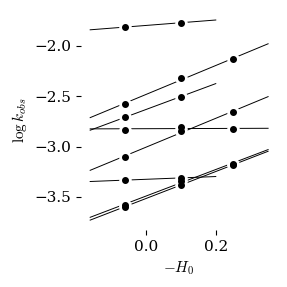

[('1', 1.3391692053817794), ('3', 1.316829902174612), ('4', 1.432996316401541), ('5', 1.2844357886495656), ('6', 1.4362995830590417), ('9', 0.01137474531296851), ('10', 0.2699704612254661), ('11', 0.1368865090489363)]


In [5]:
##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################
columns = ["1","3","4","5","6","9","10","11"]


plt.style.use("tufte.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))  

pairs = []

df["H0inWater"]=[0.20,0.09,-0.02]  ### Values from DOI: 10.1021/ja01302a027

#df["H0"]=[0.06,-0.1,-0.25]  ### Values from DOI: 10.1021/ja01302a027


for c in columns:
    x = -df["H070%DMSO"]
    y = np.log10(df[c]/10000)
    
    if np.isnan(y[2]):
        y = y[0:2]
        x = x[0:2]
    
    line = linregress(x,y)
    slope = line.slope
    r  =line.rvalue
    intercept = line.intercept
    print(slope, intercept, r**2)
    
    step = 0.01
    x_list = np.arange(np.min(x)-0.1, np.max(x)+0.1+step, step)
    y_list = x_list*slope + intercept
    ax.plot(x_list,y_list, color='black', zorder=1, linewidth=0.7)
    
    pairs.append((c,slope))

    ########################
    ### Plot the data    ###
    ########################
    
    ax.scatter(x,y, s=64, color="white", zorder=2)
    ax.scatter(x,y, s=16, color="black", zorder=3)
    
        
    ############################
    ### Set labels and scale ###
    ############################
    
    ax.set(ylabel=r"$\log{k_{obs}}$", 
           xlabel=r"$-H_0$",
    #          xlim=[0,13],                  
    #          ylim=[-2,3]
          
          )
    
    #ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

#############################
### Output the final plot ###
#############################

fig.savefig("plots/AcidPlots.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots
print(pairs)

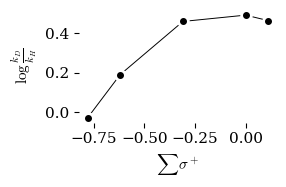

[]


In [6]:
### Plot the isotope effect vs acidity

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################
df = pd.read_csv("data/TableIVData.csv", 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="pH", 
                 comment = "#") 

#df["logk"] = np.log10(df["k_obs"])

df

Reactants = ["4","6","8","10","9"]
IsoEffect = [2.91, 3.1, 2.88,1.55,0.94]
SumSigma = [0.11,0,-0.31,-0.62,-0.78]

x = SumSigma
y = np.log10(IsoEffect)
##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

plt.style.use("tufte.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,2))  

pairs = []

#line = linregress(x,y)
#slope = line.slope
#r  =line.rvalue
#intercept = line.intercept
#print(slope, intercept, r**2)

#step = 0.01
#x_list = np.arange(2.3, 2.6+step, step)
#y_list = x_list*slope + intercept
#ax.plot(x_list,y_list, color='black', zorder=1, linewidth=0.7)

#pairs.append((c,slope))

########################
### Plot the data    ###
########################

ax.scatter(x,y, s=64, color="white", zorder=2)
ax.scatter(x,y, s=16, color="black", zorder=3)
ax.plot(x,y, color='black', zorder=1, linewidth=0.7)

    
############################
### Set labels and scale ###
############################

ax.set(ylabel=r"$\log{\frac{k_D}{k_H}}$", 
       xlabel=r"$\sum \sigma^+$",
#          xlim=[0,13],                  
#          ylim=[-2,3]
      
      )

#ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

#############################
### Output the final plot ###
#############################

fig.savefig("plots/AcidPlots2.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots
print(pairs)

In [19]:
# Order of reaction wrt H+

dictionary = {"Reactant": ["1",   "3",   "4",    "5",   "6",    "9",    "10",  "11"],
             "SumSigma": [.22,   .37,   .11,   .12,    0,    -0.78,   -0.62, -1.09],
             "H0Acetic":  [2.59, 2.55,   2.77, 2.57,    2.78,  0.02,   0.54,   0.27],
             "H0inWater": [1.89, 1.85,   2.01, 1.87,    2.02,  0.01,   0.39,   0.20],
             "H070_DMSO": [1.34, 1.31,   1.43, 1.28,    1.44,  0.01,   0.27,   0.13]}
df = pd.DataFrame.from_dict(dictionary)
df
df.sort_values(by=("SumSigma"), inplace=True)  
print(df)

  Reactant  SumSigma  H0Acetic  H0inWater  H070_DMSO
7       11     -1.09      0.27       0.20       0.13
5        9     -0.78      0.02       0.01       0.01
6       10     -0.62      0.54       0.39       0.27
4        6      0.00      2.78       2.02       1.44
2        4      0.11      2.77       2.01       1.43
3        5      0.12      2.57       1.87       1.28
0        1      0.22      2.59       1.89       1.34
1        3      0.37      2.55       1.85       1.31


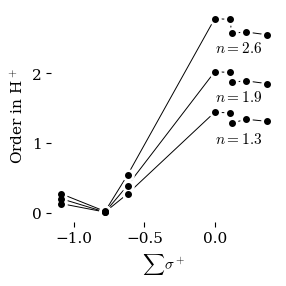

[]


In [26]:
### Plot the isotope effect vs acidity

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

x = df["SumSigma"]
y1 = df["H0Acetic"]
y2 = df["H0inWater"]
y3 = df["H070_DMSO"]

##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

plt.style.use("tufte.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))  

pairs = []

#line = linregress(x,y)
#slope = line.slope
#r  =line.rvalue
#intercept = line.intercept
#print(slope, intercept, r**2)

#step = 0.01
#x_list = np.arange(2.3, 2.6+step, step)
#y_list = x_list*slope + intercept
#ax.plot(x_list,y_list, color='black', zorder=1, linewidth=0.7)

#pairs.append((c,slope))

########################
### Plot the data    ###
########################

ax.scatter(x,y1, s=64, color="white", zorder=2)
ax.scatter(x,y1, s=16, color="black", zorder=3)
ax.plot(x,y1, color='black', zorder=1, linewidth=0.7)

ax.scatter(x,y2, s=64, color="white", zorder=2)
ax.scatter(x,y2, s=16, color="black", zorder=3)
ax.plot(x,y2, color='black', zorder=1, linewidth=0.7)

ax.scatter(x,y3, s=64, color="white", zorder=2)
ax.scatter(x,y3, s=16, color="black", zorder=3)
ax.plot(x,y3, color='black', zorder=1, linewidth=0.7)

ax.text(0, 1, r"$n=1.3$")  
ax.text(0, 1.6, r"$n=1.9$")  
ax.text(0, 2.3, r"$n=2.6$")  



############################
### Set labels and scale ###
############################

ax.set(ylabel=r"Order in H$^+$", 
       xlabel=r"$\sum \sigma^+$",
#          xlim=[0,13],                  
#          ylim=[-2,3]
      
      )

#ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

#############################
### Output the final plot ###
#############################

fig.savefig("plots/AcidPlots3.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots
print(pairs)

In [9]:
### Erying Plots

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################
#file = "data/TableVIIIData.csv"
file = "data/TableVIIIDataExpEditted.csv"
#file = "data/TableVIIIData.csv"


df = pd.read_csv(file, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="pH", 
                 comment = "#") 

#df["logk"] = np.log10(df["k_obs"])

df

,Temp,1,2,3,4,5,6,7,8,9,10,11,12
0,15,NaN,NaN,NaN,1.87,6.39,9.66,12.3,23.3,5.60,53.4,NaN,NaN
1,20,1.26,NaN,1.54,3.90,9.88,15.50,21.8,44.5,8.82,99.2,2.79,NaN
2,25,2.53,1.36,2.64,7.88,19.50,26.40,39.2,86.3,14.70,153.0,4.64,0.238
3,30,4.93,2.25,5.06,12.20,33.00,50.40,66.2,137.0,24.40,NaN,8.00,NaN
4,35,8.89,NaN,9.94,23.80,NaN,76.20,NaN,NaN,36.00,NaN,NaN,0.701


In [10]:


df2 = df[["Temp","2"]]
df3 = df2.dropna()
df3


,Temp,2
2,25,1.36
3,30,2.25


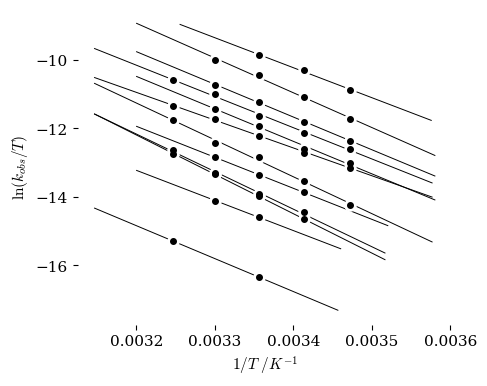

   Reactant         dH         dS
0         1  22.848404  -2.063939
1         2  17.485527 -21.276975
2         3  21.801252  -5.360442
3         4  21.402989  -4.834129
4         5  18.856066 -11.437259
5         6  18.140153 -13.079137
6         7  18.979401  -9.607201
7         8  20.178587  -4.121037
8         9  16.134217 -21.075207
9        10  17.402400 -12.105235
10       11  18.003155 -17.063582
11       12  19.118032 -19.265529


In [11]:
##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

kb = 1.380649E-23
h = 1.054572E-34
kappa = 1



plt.style.use("tufte.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

pairs = []
columns = ["1","2","3","4","5","6","7","8","9","10","11","12"]


#df["H0"]=[0.06,-0.1,-0.25]  ### Values from DOI: 10.1021/ja01302a027


for c in columns:
    
    df2 = df[["Temp",c]]
    df3 = df2.dropna()
    
    T = df3["Temp"]+273
    x = 1/T
    y = np.log((df3[c]/10000)/T)
    
     
    line = linregress(x,y)
    slope = line.slope
    r  =line.rvalue
    intercept = line.intercept
#    print(slope, intercept, r**2)
    
    step = 0.00001
    x_list = np.arange(np.min(x)-0.0001, np.max(x)+0.0001+step, step)
#    x_list = np.arange(0-0.0001, np.max(x)+0.0001+step, step)
    y_list = x_list*slope + intercept
    ax.plot(x_list,y_list, color='black', zorder=1, linewidth=0.7)
    
    H = -slope*8.314/1000/4.18
    S = (intercept - np.log(kappa*kb/h))*8.314/4.18
    
    pairs.append((c,H,S))

    ########################
    ### Plot the data    ###
    ########################
    
    ax.scatter(x,y, s=64, color="white", zorder=2)
    ax.scatter(x,y, s=16, color="black", zorder=3)
    
        
    ############################
    ### Set labels and scale ###
    ############################
    
    ax.set(ylabel=r"$\ln({{k_{obs}}/{T}})$", 
           xlabel=r"${1/T}~/K^{-1}$",
#              xlim=[0,0.0036],                  
#              ylim=[-20,3]
          
          )
    
    #ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

#############################
### Output the final plot ###
#############################

fig.savefig("plots/PlotsErying.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots

df4 = pd.DataFrame(pairs, columns = ["Reactant", "dH", "dS"])
print(df4)

In [12]:
## Authors Eryoing Plots

## When using editted data the first value for "1" is cut and the last value for "2" is cut.

### Erying Plots

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################
df = pd.read_csv("data/TableVIIIDataXtraPointsEditted.csv", 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="pH", 
                 comment = "#") 

#df["logk"] = np.log10(df["k_obs"])

df

,Temp,1,2,3,4,5,6,7,8,9,10,11,12
0,15,NaN,0.257,0.646,1.87,6.39,9.66,12.3,23.3,5.60,53.4,2.04,NaN
1,20,1.26,0.631,1.540,3.90,9.88,15.50,21.8,44.5,8.82,99.2,2.79,0.120
2,25,2.53,1.360,2.640,7.88,19.50,26.40,39.2,86.3,14.70,153.0,4.64,0.238
3,30,4.93,2.250,5.060,12.20,33.00,50.40,66.2,137.0,24.40,282.0,8.00,0.417
4,35,8.89,NaN,9.940,23.80,57.50,76.20,148.0,283.0,36.00,363.0,12.30,0.701


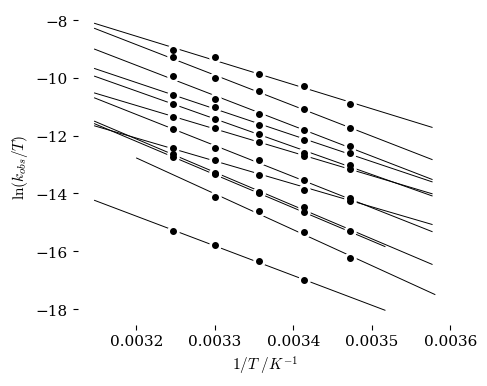

   Reactant         dH         dS
0         1  22.848404  -2.063939
1         2  24.714719   2.770758
2         3  22.908044  -1.705642
3         4  21.402989  -4.834129
4         5  19.158722 -10.403710
5         6  18.140153 -13.079137
6         7  20.854736  -3.203065
7         8  20.995654  -1.330812
8         9  16.134217 -21.075207
9        10  16.649109 -14.661943
10       11  15.784223 -24.439428
11       12  20.440862 -14.914375


In [13]:
##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

kb = 1.380649E-23
h = 1.054572E-34
kappa = 1



plt.style.use("tufte.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

pairs = []
columns = ["1","2","3","4","5","6","7","8","9","10","11","12"]


#df["H0"]=[0.06,-0.1,-0.25]  ### Values from DOI: 10.1021/ja01302a027


for c in columns:
    
    df2 = df[["Temp",c]]
    df3 = df2.dropna()
    
    T = df3["Temp"]+273
    x = 1/T
    y = np.log((df3[c]/10000)/T)
    
     
    line = linregress(x,y)
    slope = line.slope
    r  =line.rvalue
    intercept = line.intercept
#    print(slope, intercept, r**2)
    
    step = 0.00001
    x_list = np.arange(np.min(x)-0.0001, np.max(x)+0.0001+step, step)
#    x_list = np.arange(0-0.0001, np.max(x)+0.0001+step, step)
    y_list = x_list*slope + intercept
    ax.plot(x_list,y_list, color='black', zorder=1, linewidth=0.7)
    
    H = -slope*8.314/1000/4.18
    S = (intercept - np.log(kappa*kb/h))*8.314/4.18
    
    pairs.append((c,H,S))

    ########################
    ### Plot the data    ###
    ########################
    
    ax.scatter(x,y, s=64, color="white", zorder=2)
    ax.scatter(x,y, s=16, color="black", zorder=3)
    
        
    ############################
    ### Set labels and scale ###
    ############################
    
    ax.set(ylabel=r"$\ln({{k_{obs}}/{T}})$", 
           xlabel=r"${1/T}~/K^{-1}$",
    #          xlim=[0,13],                  
    #          ylim=[-2,3]
          
          )
    
    #ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

#############################
### Output the final plot ###
#############################

fig.savefig("plots/PlotsErying2.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots

df4 = pd.DataFrame(pairs, columns = ["Reactant", "dH", "dS"])
print(df4)

In [14]:
### Plotting Entropies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################
#file = "TableVIIIData.csv"
file = "data/dS_data.csv"


df = pd.read_csv(file, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="pH", 
                 comment = "#") 

#df["logk"] = np.log10(df["k_obs"])

df

,Reactant,sum_sigma_plus,Edited dS,Exp dS,Author dS
0,1,0.22,-2.1,-2.1,1.6
1,2,0.43,2.8,57.8,4.4
2,3,0.37,-1.7,-5.4,2.7
3,4,0.11,-4.8,-4.8,-0.8
4,5,0.12,-10.4,-11.4,4.3
5,6,0.00,-13.1,-13.1,-2.6
6,7,-0.07,-3.2,-9.6,1.4
7,8,-0.31,-1.3,-4.1,-1.0
8,9,-0.78,-21.1,-21.1,-16.7
9,10,-0.62,-14.7,-12.1,-12.3


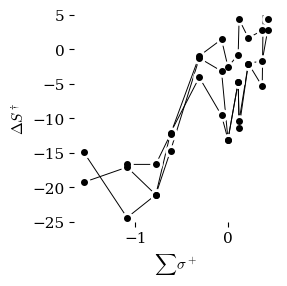

In [15]:
##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

df.sort_values(by=("sum_sigma_plus"), inplace=True)  

x = df["sum_sigma_plus"]
y1 = df["Author dS"][1:12]
y2 = df["Exp dS"]
y3 = df["Edited dS"]
x1 = x[1:12]


plt.style.use("tufte.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))  

 



########################
### Plot the data    ###
########################
y = y3

ax.plot(x,y, color='black', zorder=1, linewidth=0.7)
ax.scatter(x,y, s=64, color="white", zorder=2)
ax.scatter(x,y, s=16, color="black", zorder=3)

y = y2

ax.plot(x,y, color='black', zorder=1, linewidth=0.7)
ax.scatter(x,y, s=64, color="white", zorder=2)
ax.scatter(x,y, s=16, color="black", zorder=3)

y = y1
x = x1
ax.plot(x,y, color='black', zorder=1, linewidth=0.7)
ax.scatter(x,y, s=64, color="white", zorder=2)
ax.scatter(x,y, s=16, color="black", zorder=3)

############################
### Set labels and scale ###
############################

ax.set(ylabel=r"$\Delta S^\dagger$", 
       xlabel=r"$\sum \sigma^+$",
#          xlim=[0,13],                  
          ylim=[-25,5]
      
      )

#ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

#############################
### Output the final plot ###
#############################

fig.savefig("plots/PlotsEntropy1.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots



In [16]:
## better Erying?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################
df = pd.read_csv("data/TableVIIIDataXtraPointsEditted.csv", 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="pH", 
                 comment = "#") 

#df["logk"] = np.log10(df["k_obs"])

df

,Temp,1,2,3,4,5,6,7,8,9,10,11,12
0,15,NaN,0.257,0.646,1.87,6.39,9.66,12.3,23.3,5.60,53.4,2.04,NaN
1,20,1.26,0.631,1.540,3.90,9.88,15.50,21.8,44.5,8.82,99.2,2.79,0.120
2,25,2.53,1.360,2.640,7.88,19.50,26.40,39.2,86.3,14.70,153.0,4.64,0.238
3,30,4.93,2.250,5.060,12.20,33.00,50.40,66.2,137.0,24.40,282.0,8.00,0.417
4,35,8.89,NaN,9.940,23.80,57.50,76.20,148.0,283.0,36.00,363.0,12.30,0.701


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################
#file = "data/TableVIIIData.csv"
file = "data/TableVIIIDataExpEditted.csv"
#file = "data/TableVIIIData.csv"


df = pd.read_csv(file, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="pH", 
                 comment = "#") 

#df["logk"] = np.log10(df["k_obs"])

df

,Temp,1,2,3,4,5,6,7,8,9,10,11,12
0,15,NaN,NaN,NaN,1.87,6.39,9.66,12.3,23.3,5.60,53.4,NaN,NaN
1,20,1.26,NaN,1.54,3.90,9.88,15.50,21.8,44.5,8.82,99.2,2.79,NaN
2,25,2.53,1.36,2.64,7.88,19.50,26.40,39.2,86.3,14.70,153.0,4.64,0.238
3,30,4.93,2.25,5.06,12.20,33.00,50.40,66.2,137.0,24.40,NaN,8.00,NaN
4,35,8.89,NaN,9.94,23.80,NaN,76.20,NaN,NaN,36.00,NaN,NaN,0.701


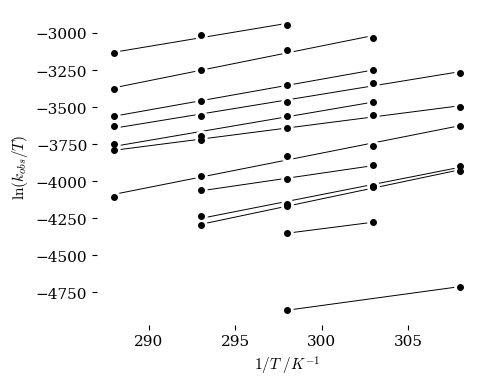

   Reactant         dH         dS
0         1  22.832990  -2.115243
1         2  17.485527 -21.276975
2         3  21.843660  -5.219295
3         4  21.372416  -4.936754
4         5  18.886312 -11.334886
5         6  18.154476 -13.031059
6         7  18.976926  -9.615578
7         8  20.144639  -4.235942
8         9  16.131423 -21.084585
9        10  17.369702 -12.216843
10       11  18.013713 -17.028149
11       12  19.118032 -19.265529


In [18]:
##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

kb = 1.380649E-23
h = 1.054572E-34
kappa = 1



plt.style.use("tufte.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

pairs = []
columns = ["1","2","3","4","5","6","7","8","9","10","11","12"]


#df["H0"]=[0.06,-0.1,-0.25]  ### Values from DOI: 10.1021/ja01302a027


for c in columns:
    
    df2 = df[["Temp",c]]
    df3 = df2.dropna()
    
    T = df3["Temp"]+273
    x = T
    y = T*np.log((df3[c]/10000)/T)
    
     
    line = linregress(x,y)
    slope = line.slope
    r  =line.rvalue
    intercept = line.intercept
#    print(slope, intercept, r**2)
    
    step = 0.00001
    x_list = np.arange(np.min(x)-0.0001, np.max(x)+0.0001+step, step)
#    x_list = np.arange(0-0.0001, np.max(x)+0.0001+step, step)
    y_list = x_list*slope + intercept
    ax.plot(x_list,y_list, color='black', zorder=1, linewidth=0.7)
    
    H = -intercept*8.314/1000/4.18
    S = (slope - np.log(kappa*kb/h))*8.314/4.18
    
    pairs.append((c,H,S))

    ########################
    ### Plot the data    ###
    ########################
    
    ax.scatter(x,y, s=64, color="white", zorder=2)
    ax.scatter(x,y, s=16, color="black", zorder=3)
    
        
    ############################
    ### Set labels and scale ###
    ############################
    
    ax.set(ylabel=r"$\ln({{k_{obs}}/{T}})$", 
           xlabel=r"${1/T}~/K^{-1}$",
    #          xlim=[0,13],                  
    #          ylim=[-2,3]
          
          )
    
    #ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

#############################
### Output the final plot ###
#############################

fig.savefig("plots/PlotsErying2.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots

df4 = pd.DataFrame(pairs, columns = ["Reactant", "dH", "dS"])
print(df4)